In [2]:
import cv2

In [2]:
img1 = cv2.imread('../DATA/dog_backpack.png')

In [3]:
img2 = cv2.imread('../DATA/watermark_no_copy.png')

In [4]:
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

In [5]:
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [7]:
import matplotlib.pyplot as plt

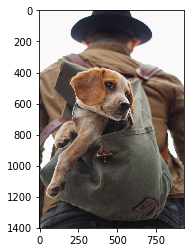

In [7]:
plt.imshow(img1)

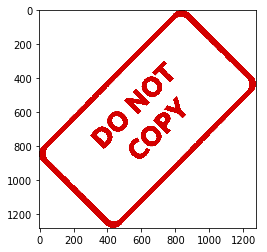

In [9]:
plt.imshow(img2)

In [10]:
img1.shape

(1401, 934, 3)

In [11]:
img2.shape

(1280, 1277, 3)

In [12]:
# BLENDING IMAGES OF THE SAME SIZE
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

In [13]:
plt.imshow(img1)

In [14]:
plt.imshow(img2)

In [18]:
blended = cv2.addWeighted(img1,0.5,img2,0.5,10)

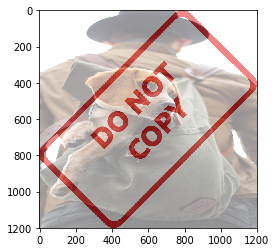

In [19]:
plt.imshow(blended)

In [20]:
# OVERLAY SMALL IMAGE ONTOP OF BIG IMAGE (NO BLENDING)
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [21]:
img2 = cv2.resize(img2,(600,600))

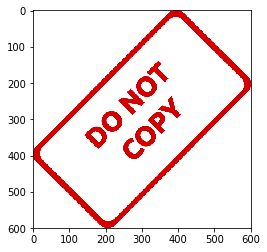

In [22]:
plt.imshow(img2)

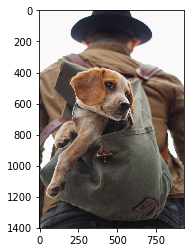

In [23]:
plt.imshow(img1)

In [24]:
# fit the 600 x 600 images onto the large one
large_img = img1
small_img = img2

In [25]:
x_offset = 0
y_offset = 0

In [26]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [27]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

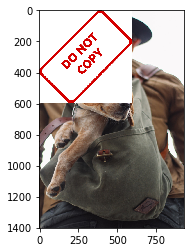

In [28]:
plt.imshow(large_img)

# PART 2 - MASKS

In [67]:
# SETUP
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2,(600,600))

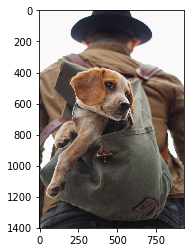

In [68]:
plt.imshow(img1)

In [69]:
# grab a region of interest (ROI) to grab onto
img1.shape
x_offset = 934 - 600
x_end = 934
y_offset = 1401 - 600
y_end= 1401

In [70]:
img2.shape

(600, 600, 3)

In [71]:
rows,cols,channels = img2.shape

In [72]:
roi = img1[y_offset:y_end,x_offset:x_end]

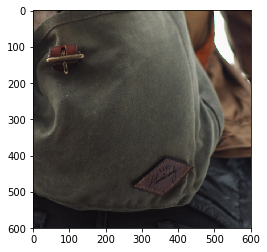

In [73]:
# this is our roi, the size of image 2
plt.imshow(roi)

In [74]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

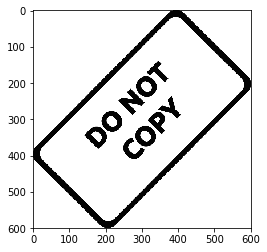

In [75]:
plt.imshow(img2gray,cmap='gray')

In [76]:
# inverts everything (bitwise_not)
mask_inv = cv2.bitwise_not(img2gray)

In [77]:
plt.imshow(mask_inv,cmap='gray')

In [78]:
# full() will fill matrix with certain value
import numpy as np
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [79]:
white_background.shape

(600, 600, 3)

In [80]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [81]:
bk.shape

(600, 600, 3)

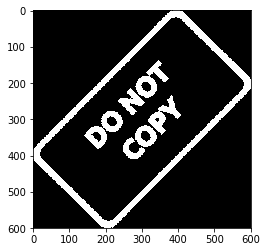

In [82]:
plt.imshow(bk)

In [83]:
# the first 2 images are or'ed depending on the mask
# if value is non-zero in the mask, the same location in the images will be OR'ed
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

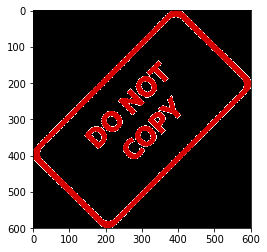

In [84]:
plt.imshow(fg)

In [85]:
final_roi = cv2.bitwise_or(roi,fg)

In [87]:
plt.imshow(final_roi)

In [88]:
large_img = img1
small_img = final_roi

In [89]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

In [90]:
plt.imshow(large_img)